# N-Dimensional Perceptron

This Jupyter Notebook implements an N-dimensional perceptron. More information can be found in the repository README.

## Setup

### Packages

In [1]:
!pip install pandas numpy matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### Importing Packages

In [2]:
import random
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## 1. Data Loading

In [3]:
DATA_DIR = 'data'
DATA_FILE = 'neo_v2.csv'
DATA_FILEPATH = f'{DATA_DIR}/{DATA_FILE}'

# for reproducibility
RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)
# np.random.seed(random.randint(0, 1_000_000_000))

### Clean and Format the Data

In [4]:
data = pd.read_csv(DATA_FILEPATH, header=0)

data['hazardous'] = data['hazardous'].astype(int)

data = data.drop(columns = ['sentry_object', 'orbiting_body', 'name', 'id'])

In [5]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


#### Labels

In [6]:
y = data.iloc[:,-1]

y = y.to_numpy()

print(y)

classes, amount = np.unique(y, return_counts=True)

for idx in range(len(classes)):
    print(f'Class: {classes[idx]}, Percent: {amount[idx] / len(y) * 100}')

[0 1 0 ... 0 0 0]
Class: 0, Percent: 90.26817561319301
Class: 1, Percent: 9.731824386806993


#### Features

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))

X = scaler.fit_transform(data.iloc[:, 1:-1])

X

array([[3.16072151e-02, 5.64469972e-02, 7.33140811e-01, 3.12891114e-01],
       [6.99859603e-03, 3.09921777e-01, 8.21364026e-01, 4.49311640e-01],
       [1.90388437e-02, 4.81679530e-01, 6.65740213e-01, 3.58781811e-01],
       ...,
       [8.27278640e-04, 3.10974339e-02, 3.79640314e-01, 6.41218189e-01],
       [1.77130265e-04, 2.91383698e-01, 9.18352249e-01, 7.74718398e-01],
       [1.03590911e-03, 1.13271142e-01, 7.99088943e-01, 6.21193158e-01]])

### Split the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## 2. Initialize Perceptron

Before we can do that, we must create the perceptron class.

In [9]:
class Perceptron:
    def __init__(self, D, epochs, acc_threshold, activ, print_freq, learning_rate):
        self.D = D
        self.epochs = epochs
        self.acc_threshold = acc_threshold
        self.activ = activ
        self.print_freq = print_freq
        self.learning_rate = learning_rate
        
        # initialize weights and biases
        self.W = np.random.rand(self.D,)
        self.b = np.random.rand()

    def train(self, X, y):
        
        # for each epoch
        for e in range(epochs):
            errors = 0
            
            # for each datapoint
            for idx, x in enumerate(X):
                # make a prediction
                y_prime = self.predict(x)

                # update rule
                if y_prime != y[idx]:
                    errors += 1
                    
                    self.W = self.W + (y[idx] - y_prime) * x * self.learning_rate
                    self.b = self.b + (y[idx] - y_prime) * self.learning_rate

            # check accuracy
            N = len(y)
            correct = N - errors
            accuracy = correct / N
            if e % self.print_freq == 0:
                print(f'W: {self.W}, b: {self.b}')
                print(f'Achieved accuracy of {round(accuracy * 100, 2)}%.')
            if accuracy > acc_threshold:
                print(f'Surpassed threshold ({self.acc_threshold * 100}%). Stopping.')
    
    def predict(self, x):
        y_prime = np.dot(self.W, x) + self.b
        return self.activ(y_prime)

    def test(self, X, y):
        # for calculating metrics later
        P, N, TP, TN = 0, 0, 0, 0
        
        for idx, x in enumerate(X):
            is_positive = y[idx]
            if is_positive:
                P += 1
            else:
                N += 1
            
            y_prime = self.predict(x, self._sigmoid)

            if y_prime == y[idx]:
                if is_positive:
                    TP += 1
                else:
                    TN += 1

        print(f'Accuracy: {(TP + TN) / (P + N)}')

In [10]:
learning_rate = 0.001
epochs = 20
acc_threshold = 0.95
D = X_train.shape[1]
print_freq = 5

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return 1 if y > 0.5 else 0

net = Perceptron(
    D=D,
    epochs=epochs,
    acc_threshold=acc_threshold,
    activ=sigmoid,
    print_freq=print_freq,
    learning_rate=learning_rate
)

In [11]:
net.train(X_train, y_train)

W: [ 0.97128736  0.00361348 -0.00327318  0.01908402], b: -0.01628651024916644
Achieved accuracy of 83.6%.
W: [ 0.72934711  0.0034288  -0.00202327  0.01380322], b: -0.012286510249166438
Achieved accuracy of 84.68%.
W: [ 0.49591158  0.00323615 -0.00181197  0.00839408], b: -0.007286510249166434
Achieved accuracy of 84.69%.
W: [ 0.27865267  0.00182558 -0.00124772  0.00351235], b: -0.004286510249166434
Achieved accuracy of 84.67%.


## Why does it start at roughtly 85% accuracy each time?

The perceptron seems to start at 85% accuracy each time I train it. I'm initializing the weights randomly and I'm seeding the random generation with something random each time I run the code. It also seems to plateau at 86%. Of course, this could just the max efficiency of this algorithm against this dataset, but I feel like there may be more to it. It could also be that the learning rate is too high and it can't sqeeze into a minima. I want to investigate the cause of all this.

### Recording Weights

Starting values:
```
W  0.1682  0.6354  0.0020 -0.0014  0.0149
b -0.0116

W  0.8737  0.6569  0.0025 -0.0035  0.0317
b -0.0245
```

Convergent values:
```
W -0.2812  0.1861  0.0006  0.0014  0.0140
b  0.0063
```

This didn't really go anywhere.

I tried turning up the learning rate to 1000, which cause integer overflow when computing the sigmoid function. I also tried seeding the random number generator with integers from 0 to 1 billion (1,000,000,000). Each of these things led to the same result: 85% accuracy.

I've decided to plot the data and the weights and see if that brings me some insight into the cause of this.

If that leads nowhere, I may just attempt to implement a much more complex neural network to see if that manages to do any better. A clustering algorithm like K-means clustering may also grant some useful information.

### Plotting the Data and Model Parameters

[! related article !](http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/)

Probably should have done all this before I started training a model.

In [12]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


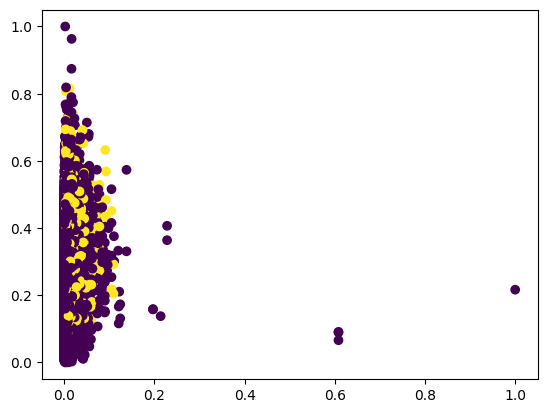

In [13]:
plotX = X[:,0]
plotY = X[:,1]

# standard deviation?
sigma = 1
# mean
mu = 0.01

noise = sigma * np.random.randn(len(plotX)) + mu

plt.scatter(plotX, plotY, c=y)

plt.show()

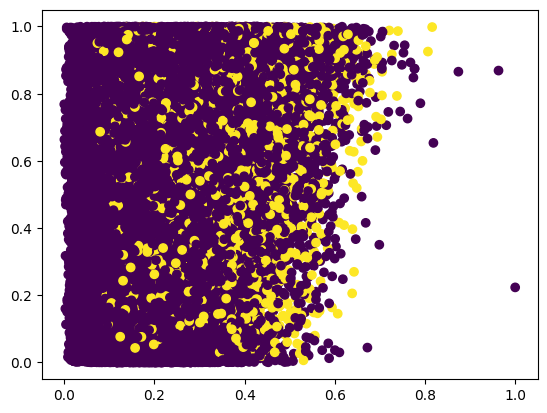

In [14]:
plotX = X[:,1]
plotY = X[:,2]

# standard deviation?
sigma = 1
# mean
mu = 0.01

noise = sigma * np.random.randn(len(plotX)) + mu

plt.scatter(plotX, plotY, c=y)

plt.show()

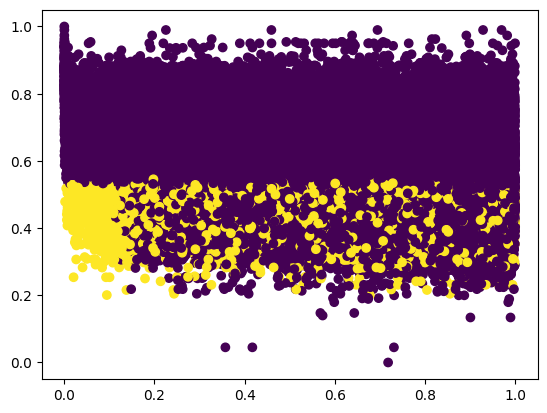

In [15]:
plotX = X[:,2]
plotY = X[:,3]

# standard deviation?
sigma = 1
# mean
mu = 0.01

noise = sigma * np.random.randn(len(plotX)) + mu

plt.scatter(plotX, plotY, c=y)

plt.show()

These graphs aren't telling me much. I think I really just don't know what to graph or how to determine which plots would be better for EDA.

Anyways, I want to try an SVM because 1) it's a gradual progression (obviously, I could just throw a neural network at the data now), and 2) I think the Kernel Trick might lead to better separation.

Thank you Jason Fleisher (JAYsun FLYsher) for teaching COGS 118A. That was the best class I took in all four of my years. Not even joking.

## SVM Implementation

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from scipy.stats import uniform, truncnorm, randint
from sklearn.ensemble import RandomForestClassifier

In [17]:
def plot_results(grid_search, alt_cv = False):
    params = grid_search.cv_results_["params"]
    ys = grid_search.cv_results_["mean_test_score"]
    xs = ['|'.join(str(v) for v in param.values()) for param in params]
    yerr = grid_search.cv_results_["std_test_score"]
    cv_count = grid_search.cv.get_n_splits() if alt_cv else grid_search.cv
    plt.errorbar(xs, ys, yerr / np.sqrt(cv_count), fmt='.k')
    plt.xticks(ticks=[])
    plt.ylabel("score")
    plt.xlabel("params")
    
def show_best(cv):
    print('Best Parameters:')
    print(cv.best_params_)
    print('Score:', cv.best_score_)

In [18]:
# In order to easily modulate the size of the validation set
# and keep it equal between all algorithms

validation_size = 1000

In [19]:
svm_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state = RANDOM_STATE))])

svm_params_gs = {
    'svc__C': [1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf'],
    'svc__degree': [3, 4, 5],
    'svc__gamma': ['scale', 'auto'],
}

svm_gscv = GridSearchCV(svm_pipeline, svm_params_gs, cv=5, verbose=1, scoring='accuracy')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters:
{'svc__C': 10, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
Score: 0.9020000000000001


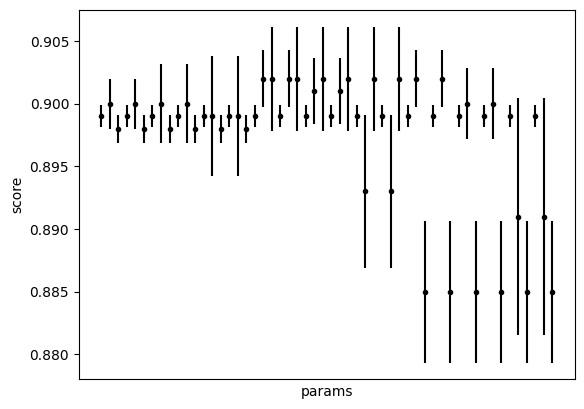

In [20]:
svm_gscv.fit(X_train[:validation_size], y_train[:validation_size])

show_best(svm_gscv)

plot_results(svm_gscv)

Looks like our accuracy is improving!

> Note: SVM training takes a lot longer than I remembered. Additionally, the time it takes to train N samples does not scale linearly as N increases.

Let's also implement a random forest because it's just a wonderful algorithm and quite quick to train.

In [21]:
forest_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('forest', RandomForestClassifier(random_state=42))])

forest_params_gs = {
    'forest__n_estimators': [50, 100, 200, 400],
    'forest__criterion': ['gini', 'entropy'],
    'forest__max_depth': [30, 50, 60, 90],
    'forest__min_samples_split': [2, 7, 9, 12],
    'forest__max_features': ['sqrt'],
    'forest__bootstrap': [True]
}

forest_gscv = GridSearchCV(forest_pipeline, forest_params_gs, cv=5, verbose=1, scoring='accuracy')

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters:
{'forest__bootstrap': True, 'forest__criterion': 'entropy', 'forest__max_depth': 30, 'forest__max_features': 'sqrt', 'forest__min_samples_split': 12, 'forest__n_estimators': 400}
Score: 0.8869999999999999


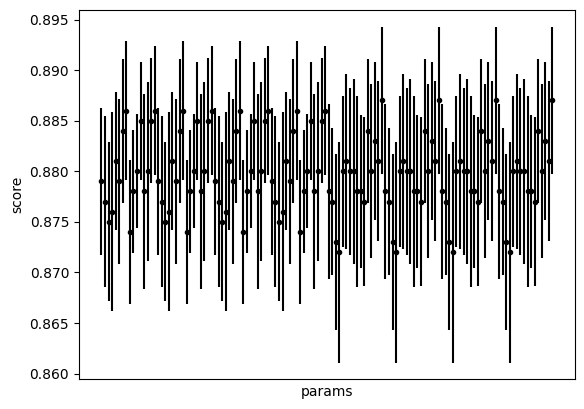

In [22]:
forest_gscv.fit(X_train[:validation_size], y_train[:validation_size])

show_best(forest_gscv)

plot_results(forest_gscv)

Looks like these models are at least doing _better_ than a single perceptron, but they're still only hitting ~90%. After implementing all of these, I've decided to just throw a neural network at it as a last resort to see how much closer I can get.

Hopefully, with GPU acceleration, I will be able to train this NN pretty quickly.